<a href="https://colab.research.google.com/github/aravindh698/rep2/blob/master/week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('GOLD.csv')
df.head()

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      512 non-null    object 
 1   Price     512 non-null    int64  
 2   Open      512 non-null    int64  
 3   High      512 non-null    int64  
 4   Low       512 non-null    int64  
 5   Vol.      512 non-null    object 
 6   Change %  512 non-null    object 
 7   Pred      411 non-null    float64
 8   new       512 non-null    float64
dtypes: float64(2), int64(4), object(3)
memory usage: 36.1+ KB


In [0]:
df.isnull().sum()
df['Date']=pd.DatetimeIndex(df['Date'])

In [55]:
cdf=df[['Price','Open','High','Low','Pred','new']]
cdf.head(9)

,Price,Open,High,Low,Pred,new
0,28060,28400,28482,28025,738.0,117.570740
1,28184,28136,28382,28135,-146.0,295.430176
2,28119,28145,28255,28097,30.0,132.123714
3,27981,28125,28192,27947,357.0,101.298064
4,28007,28060,28146,27981,124.0,112.153318
5,28022,27995,28100,27945,149.0,182.427089
6,28019,28088,28195,27985,167.0,141.255137
7,28008,28049,28157,27996,22.0,120.069010
8,28109,28025,28159,28025,34.0,218.401641


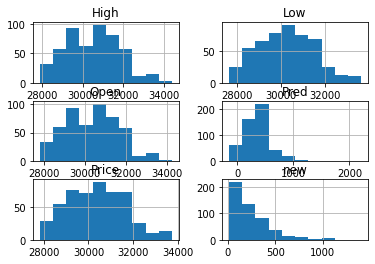

In [56]:
viz=cdf[['Price','Open','High','Low','Pred','new']]
viz.hist()
plt.show()

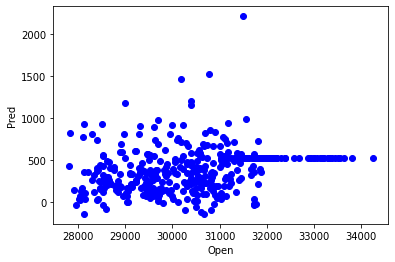

In [96]:
msk=np.random.rand(len(df)) < 0.8
train=cdf[msk]
test=cdf[~msk]
plt.scatter(train.Open,train.Pred,color='blue')
plt.xlabel("Open")
plt.ylabel("Pred")
plt.show()

In [97]:
from sklearn import linear_model
regr=linear_model.LinearRegression()
train_x=np.asanyarray(train[['Open']])
train_y=np.asanyarray(train[['Pred']])
regr.fit(train_x,train_y)
print('coeff',regr.coef_)
print('intercept',regr.intercept_)

coeff [[0.05466514]]
intercept [-1277.66839409]


Text(0, 0.5, 'Pred')

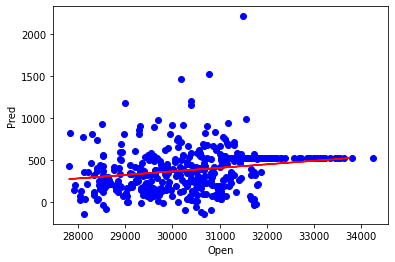

In [95]:
plt.scatter(train.Open, train.Pred,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Open")
plt.ylabel("Pred")


In [98]:
test_x = np.asanyarray(test[['Open']])
test_y = np.asanyarray(test[['Pred']])
test_y_ = regr.predict(test_x)
print(test_y_)


[[252.68213398]
 [262.24853307]
 [289.36244134]
 [289.03445051]
 [290.89306519]
 [303.30205143]
 [300.89678538]
 [284.05992298]
 [263.8884872 ]
 [249.9488771 ]
 [244.75568903]
 [267.71504683]
 [282.20130831]
 [277.82809729]
 [275.69615693]
 [302.15408354]
 [310.35385419]
 [333.25854686]
 [373.21876247]
 [343.69958814]
 [339.32637713]
 [341.23965695]
 [333.25854686]
 [348.61945053]
 [348.67411567]
 [328.12002392]
 [326.69873034]
 [332.27457438]
 [335.17182667]
 [337.686423  ]
 [340.41967989]
 [331.12660649]
 [323.30949181]
 [272.08825784]
 [318.66295511]
 [325.769423  ]
 [322.10685878]
 [326.09741383]
 [341.23965695]
 [357.20187714]
 [366.93227164]
 [369.11887714]
 [357.09254686]
 [371.57880834]
 [398.80204688]
 [381.41853311]
 [384.09712486]
 [374.42139549]
 [409.89906982]
 [395.79546431]
 [407.1111478 ]
 [426.5719368 ]
 [412.68699184]
 [430.23450102]
 [433.24108359]
 [430.67182212]
 [418.04417533]
 [428.97720285]
 [435.42768909]
 [423.56535423]
 [418.04417533]
 [397.8180744 ]
 [417.55

In [99]:
from sklearn.metrics import r2_score
print("r2: % .2f"% r2_score(test_y_,test_y))

r2: -8.10


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


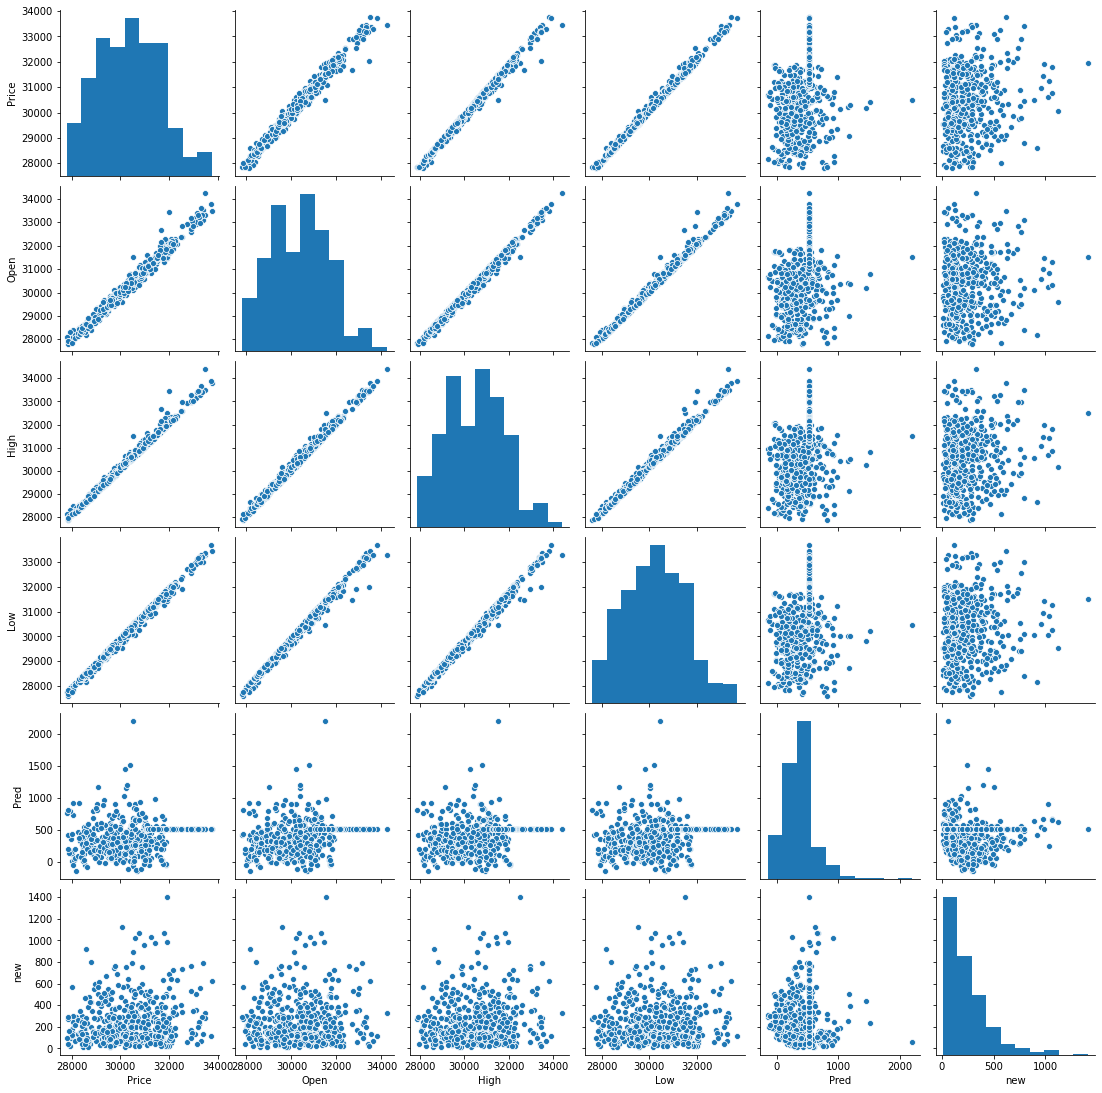

In [87]:
import seaborn as sns
sns.pairplot(df)

In [94]:
df['Open'].corr(df['Pred'])

0.264512788138835